# Example : Solution for the 1D schroedinger equation 

## Molecule : CO

In [5]:
import sys
sys.path.insert(1, './../')

# import module here
from dep import diatomicSE
from dep import transition
from dep import PES_functions


# import python modules
import scipy.optimize as opt
import math
import numpy as np

###### for plotting #########################
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 2 ;
plt.rc('axes', linewidth=2) ;
plt.rcParams.update({'font.size': 18}) ;
plt.rcParams["font.family"] = "Arial";


In [6]:
from inspect import getmembers, isfunction
func_list= getmembers(PES_functions, isfunction)

for i in func_list:
    print(i)

('modification_morse_potential', <function modification_morse_potential at 0x147052119488>)
('morse_potential', <function morse_potential at 0x147052119378>)
('rydberg_potential_3param', <function rydberg_potential_3param at 0x147052119400>)


---

### generating a PES function 

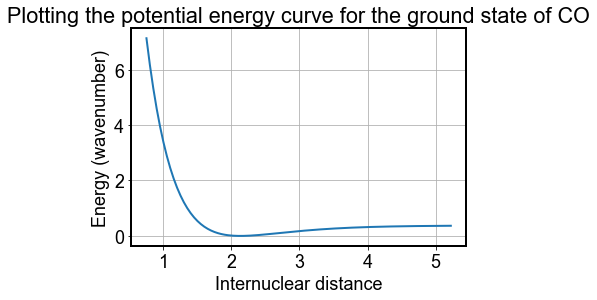

In [20]:
# CO potential parameters
# optimized params
param =np.array([0.37563416, 1.22186557, 2.13081292])
re=2.1320

distance_vector=np.arange(0.75, 5.25, 0.025)
PES = PES_functions.rydberg_potential_3param(param ,  distance_vector )


#plotting the test PES


plt.plot(distance_vector,  PES )
plt.xlabel('Internuclear distance')
plt.ylabel('Energy (wavenumber)')
plt.title('Plotting the potential energy curve for the ground state of CO')
plt.grid()

---

### Getting rovibrational energies of CO

In [21]:
# set params

step = 0.004
J_level = 0
e = diatomicSE.get_eigenvalue_J( 6, 12, 8, 16, distance_vector, PES, 5, step , J_level  )

In [22]:
print(e.shape)

(1115, 1)


### Evaulate the full solution

In [23]:
solution = diatomicSE.get_fullsolution_J( 6, 12, 8, 16, distance_vector, PES, 5, step , J_level  )

In [24]:
distance = solution[0]
print(distance.shape)

(1115,)


In [25]:
energy = solution[1]
print(distance.shape)

(1115,)


In [26]:
wfns = solution[2]
print(wfns[:,0].shape)

(1115,)


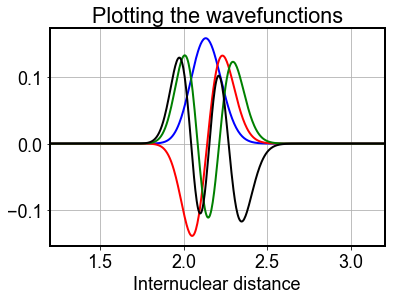

In [27]:
plt.plot(distance ,  wfns[:,0], 'b' , distance ,  wfns[:,1], 'r', distance ,  wfns[:,2], 'g', distance ,  wfns[:,3], 'k')
plt.xlabel('Internuclear distance')
plt.xlim([1.2, 3.2])
plt.title('Plotting the wavefunctions')
plt.grid()

### The obtained solution is a tuple

In [28]:
print(len(solution))


print(solution[0].shape)
print(solution[0])

3
(1115,)
[0.758 0.762 0.766 ... 5.206 5.21  5.214]


In [29]:
print(solution[1].shape)
print(solution[1])

(1115, 1)
[[1.09551369e+03]
 [3.23918924e+03]
 [5.35659301e+03]
 ...
 [4.13484345e+06]
 [4.21879938e+06]
 [4.32551717e+06]]


In [30]:
print(solution[2].shape)
print(solution[2])

(1115, 1115)
[[-3.70554856e-017  8.53523081e-017 -7.71543263e-018 ...  1.42848202e-001
  -1.43835788e-001 -1.44803883e-001]
 [ 3.03310508e-017  1.37491034e-016 -1.53458335e-017 ... -2.24890552e-001
   2.40036408e-001  2.58854111e-001]
 [ 4.44191977e-017  1.49803843e-016 -1.48398339e-017 ...  2.30571560e-001
  -2.77150313e-001 -3.39605257e-001]
 ...
 [ 4.02941333e-017 -5.42627605e-016  5.09583790e-016 ...  3.79935988e-318
   0.00000000e+000  0.00000000e+000]
 [ 4.91672786e-017  1.10087018e-016  8.49846616e-017 ... -7.70811577e-319
   0.00000000e+000  0.00000000e+000]
 [-8.61220006e-017  8.77802865e-016 -5.30471344e-016 ... -6.14618652e-318
   0.00000000e+000  0.00000000e+000]]


---